<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week10/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Week 10
# Dimensionality Reduction

Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data.

Useful for:
* Classification (improve accuracy by removing noise in data)
* Data visualization

### Table of Contents
#### 1. Basic Examples
* 1.1 Visualization with PCA
* 1.2 PCA: exercise
* 1.3 MDS

#### 2. SMS Classification: with PCA vs. without PCA
* 2.1 Load and explore data
* 2.2 Train test split
* 2.3 Clean and Vectorize text
* 2.4 PCA
* 2.5 Logistic regression
* 2.6 KNN

#### 3. Text data vizualisation with t-SNE, and ISOMAP

Author: Luc Kunz

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import bs4 as bs
import urllib.request
import spacy
import string
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split

# Load English language model of spacy
sp = spacy.load('en_core_web_sm')

# Style
plt.style.use('dark_background')

# Set seed
seed = np.random.RandomState(seed=42)

## 1. Basic Examples
We review some of the concepts seen in class using basic examples.

### 1.1 Visualization with PCA

Idea of PCA: project data points in lower dimensional space in the direction that retains a maximum variance.


![PCA](http://lazyprogrammer.me/wp-content/uploads/2015/11/PCA.jpg)

We use cancer data that can be found [here](https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset).

In [2]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week10/data/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


We have 5 features and 1 class. We want to use the features to predict the class.

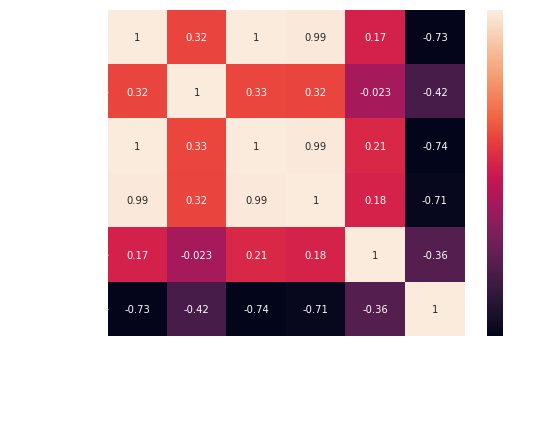

In [3]:
# Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

There are some high correlations, so PCA may be useful.

In [4]:
# Select features
X = df.drop(['diagnosis'], axis=1)
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


Sometimes PCA works better with Standardization. Try with and without to see the difference.

In [5]:
# Standardize data
#X = StandardScaler().fit_transform(X)
#X

In [6]:
# Apply PCA
pca = PCA(n_components=2)
result = pd.DataFrame(pca.fit_transform(X), columns=['Principal Component 1', 'Principal Component 2'])
print(pca.explained_variance_ratio_)
print('Ratio of variance expalined with the two components: ', round(sum(pca.explained_variance_ratio_), 6))
result

[9.99737649e-01 1.41917845e-04]
Ratio of variance expalined with the two components:  0.99988


,Principal Component 1,Principal Component 2
0,347.389677,3.453494
1,672.360684,6.223621
2,549.459884,-0.291298
3,-269.152801,-4.103108
4,643.562702,6.210222
...,...,...
564,825.644608,3.957256
565,607.435811,-3.843375
566,203.898289,-7.802571
567,612.040081,-10.065129


In [7]:
# Concat
result['diagnosis'] = df['diagnosis']
result

,Principal Component 1,Principal Component 2,diagnosis
0,347.389677,3.453494,0
1,672.360684,6.223621,0
2,549.459884,-0.291298,0
3,-269.152801,-4.103108,0
4,643.562702,6.210222,0
...,...,...,...
564,825.644608,3.957256,0
565,607.435811,-3.843375,0
566,203.898289,-7.802571,0
567,612.040081,-10.065129,0


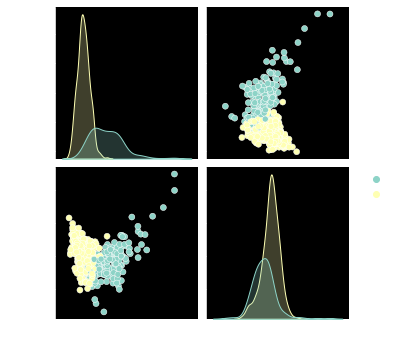

In [8]:
# Plot
sns.pairplot(result, hue='diagnosis')

It then easy to apply a classification algorithm. This is going to have a high accuracy.

### 1.2 PCA: exercise

To do in groups: follow the steps and send your answers and code @Luc Kunz on Slack (direct message). This is a good way to improve your participation grade.

We want to further illustrate PCA. For this let's define a function that returns coordinates of a plane.

In [9]:
# Plane function -> ax + by + cz = d + e
def noisy_plane(a, b, c, d, noise, n):
  """Function returns n points belonging to a plane in 3D."""
  x = 100*seed.random(n-2)
  x = np.append(x, 200)
  x = np.append(x, 50)
  y = 100*seed.random(n-2)
  y = np.append(y, 50)
  y = np.append(y, 200)
  e = seed.normal(0, noise, n)
  z = (d - a*x - b*y + e)/c
  df = pd.DataFrame(np.array([x,y,z])).transpose()
  df.columns = ['x', 'y', 'z']
  return df

# Number of points
n_samples = 500

# With noise of 50
df = noisy_plane(-2, -1, -3, 0, 50, n_samples)
df

,x,y,z
0,37.454012,97.439481,-56.208611
1,95.071431,98.621074,-106.599180
2,73.199394,69.816171,-75.033337
3,59.865848,53.609637,-35.524705
4,15.601864,30.952762,-27.055461
...,...,...,...
495,35.335223,59.023067,-37.957697
496,58.365611,36.097390,-71.161166
497,7.773464,9.158207,-10.596993
498,200.000000,50.000000,-188.655492


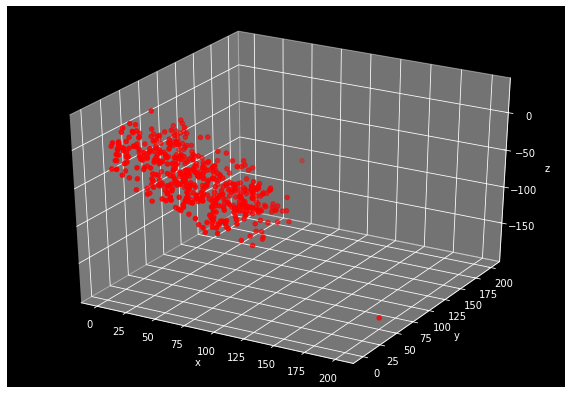

In [10]:
# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter(df.x, df.y, df.z, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

We have a plane in three-dimensional space. In addition, we have two points that are a little further away from the plane. We use PCA with 2 components.

In [11]:
# 1. Implement PCA with 2 components: What is the explained variance ratio of the first component?
# [YOUR CODE HERE]

In [12]:
# 2. Plot the two components using a scatter plot. What do you observe?
# [YOUR CODE HERE]

### 1.3 MDS
We also provide an example with Multi Dimentional Scaling. Idea: lower dimentionality using distances between points.


In [13]:
# Without noise
df = noisy_plane(-2, -1, -3, 0, 0, n_samples)
df

,x,y,z
0,8.912443,71.024280,-29.616389
1,75.527042,31.435011,-60.829698
2,12.771348,47.116790,-24.219829
3,82.606763,82.163690,-82.459072
4,78.202809,45.926520,-67.444046
...,...,...,...
495,85.817705,76.103779,-82.579730
496,81.906351,95.077271,-86.296658
497,54.079375,70.254050,-59.470934
498,200.000000,50.000000,-150.000000


In [14]:
# Standardize data
df_standardized = StandardScaler().fit_transform(df)
df_standardized

array([[-1.39175101e+00,  7.11474161e-01,  9.13650843e-01],
       [ 8.40164808e-01, -6.36288101e-01, -4.62293044e-01],
       [-1.26245875e+00, -1.02423492e-01,  1.15154178e+00],
       ...,
       [ 1.21562775e-01,  6.85252749e-01, -4.02396029e-01],
       [ 5.01061945e+00, -4.26856457e-03, -4.39309476e+00],
       [-1.51163138e-02,  5.10227537e+00, -2.18899673e+00]])

In [15]:
# Compute distances
similarities = euclidean_distances(df_standardized)
similarities[:3]

array([[0.        , 2.94807274, 0.8577517 , ..., 2.00568829, 8.34650729,
        5.54983606],
       [2.94807274, 0.        , 2.70379365, ..., 1.50547227, 5.76570401,
        6.05343887],
       [0.8577517 , 2.70379365, 0.        , ..., 2.2250106 , 8.37282144,
        6.30903725]])

In [16]:
# Add noise to distances
noise = (np.random.rand(n_samples, n_samples) - 0.5)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise
similarities[:3]

array([[0.        , 2.26165762, 0.82313059, ..., 1.43095532, 8.08017445,
        5.81987855],
       [2.26165762, 0.        , 2.56453148, ..., 1.72391777, 5.52014878,
        6.15255432],
       [0.82313059, 2.56453148, 0.        , ..., 2.21671007, 8.31448504,
        5.90732497]])

In [17]:
# MSD
from sklearn import manifold
mds = manifold.MDS(n_components=2, max_iter=100000, eps=1e-12, random_state=seed,
                   dissimilarity='precomputed', n_jobs=-1)
pos = pd.DataFrame(mds.fit_transform(similarities))
pos

,0,1
0,-1.437073,1.136477
1,0.695540,-0.914959
2,-1.694304,0.383947
3,2.032406,0.574592
4,1.123227,-0.491654
...,...,...
495,2.005631,0.377299
496,2.245725,0.988389
497,0.544753,0.598509
498,6.359670,-1.866604


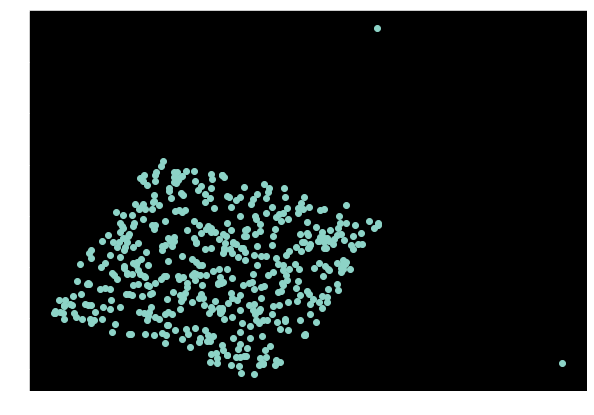

In [18]:
# Plot projection
plt.figure(figsize=(10,7))
plt.scatter(pos[0], pos[1])

## 2. SMS Classification: with vs. without PCA


### 2.1 Load and explore data

In [19]:
# Load data from GitHub
path = "https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week10/data/spam.csv"
data = pd.read_csv(path, encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


We want to predict the label (v1) based on the message text (v2).

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
# Select text only
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
data = data.rename(columns = {'v1':'label','v2':'message'})
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
# A bit of EDA
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


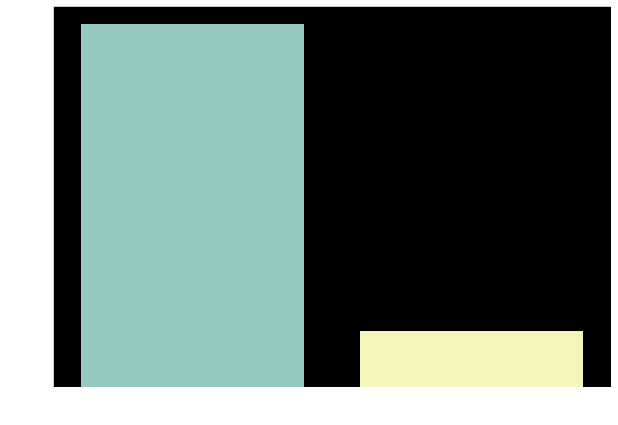

In [24]:
# Imbalanced dataset
plt.figure(figsize=(10,7))
sns.countplot(data.label)
plt.show()

In [25]:
# Base rate
data.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [26]:
# Select variables
X = data.message
y = data.label

### 2.2 Train test split


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
X_train

1869                       Mom wants to know where you at
1270    Sorry chikku, my cell got some problem thts y ...
698                        Mum ask Ì_ to buy food home...
1385    That's ok. I popped in to ask bout something a...
2628    Haha... They cant what... At the most tmr forf...
                              ...                        
3951    Me hungry buy some food good lei... But mum n ...
2885                   No probs hon! How u doinat the mo?
3941                  She's borderline but yeah whatever.
5166    Y she dun believe leh? I tot i told her it's t...
4568                  At WHAT TIME should i come tomorrow
Name: message, Length: 4457, dtype: object

### 2.3 Clean and vectorize text
We use the `re` and `nltk` packages for cleaning.

In [28]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def data_cleaner(complaint):
    
    # remove digits
    complaint = re.sub(r"\d+","", complaint)
    
    # lowercase
    complaint = complaint.lower()
    
    # remove punctuation
    complaint = re.sub(r"[^\w\s\d]","", complaint)
    
    # remove stop words
    complaint = complaint.split()
    complaint = " ".join([word for word in complaint if not word in stop_words])
    
    # Tokenize
    complaint = word_tokenize(complaint)
    
    # Stemming
    ps = PorterStemmer()
    complaint = [ps.stem(word) for word in complaint]
    
    return complaint

X_train.apply(data_cleaner)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1869                                    [mom, want, know]
1270    [sorri, chikku, cell, got, problem, tht, nt, a...
698                       [mum, ask, ì_, buy, food, home]
1385    [that, ok, pop, ask, bout, someth, said, youd,...
2628                     [haha, cant, tmr, forfeit, haha]
                              ...                        
3951    [hungri, buy, food, good, lei, mum, n, yun, du...
2885                           [prob, hon, u, doinat, mo]
3941                       [she, borderlin, yeah, whatev]
5166    [dun, believ, leh, tot, told, true, alreadi, t...
4568                               [time, come, tomorrow]
Name: message, Length: 4457, dtype: object

We use TF-IDF vectorizer.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, tokenizer=data_cleaner, ngram_range=(1,1), min_df=3, max_df=0.9)

# Fit and transform
X_train_vec = tfidf.fit_transform(X_train).toarray()
X_test_vec = tfidf.transform(X_test).toarray()
print(X_train_vec.shape)
X_train_vec

(4457, 1957)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

As we can see, `X_train_vec` has a dimentionality of 1957. We use PCA to lower this to 100.

### 2.4 PCA

In [30]:
# Standardizer
scaler = StandardScaler()

# Define PCA
pca = PCA(n_components=100)

# Example
X_train_vec_pca = pca.fit_transform(X_train_vec)
print(X_train_vec_pca.shape)
pca.n_components_

(4457, 100)


100

### 2.5 Logistic Regression
We apply logistic regression 4 times:
* Without PCA
* With Standardization
* With PCA
* With Standardization and PCA

We then compare the time to run and the accuracy on training and test sets.

In [31]:
# Without PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time

# Define Model
pipe = Pipeline([
                 ('logistic reg', LogisticRegression())
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

Time:  0.5618
Train Accuracy:  0.9731
Test Accuracy:  0.9695


In [32]:
# With Standardization
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time

# Define Model
pipe = Pipeline([('scaler', scaler),
                 ('logistic reg', LogisticRegression())
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

Time:  1.0615
Train Accuracy:  0.9998
Test Accuracy:  0.9857


In [33]:
# With PCA

# Define Model
pipe = Pipeline([
                 ('pca', pca),
                 ('logistic reg', LogisticRegression()),
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

Time:  1.6388
Train Accuracy:  0.956
Test Accuracy:  0.9632


In [34]:
# With PCA and standardization

# Define Model
pipe = Pipeline([
                 ('scaler', scaler),
                 ('pca', pca),
                 ('logistic reg', LogisticRegression(max_iter=3000)),
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

Time:  1.8767
Train Accuracy:  0.985
Test Accuracy:  0.9785


We can see that the best results are obtained in the second case:
* With Standardization

In this case, standardization increases the performance, but PCA does not.

### 2.6 KNN
We apply KNN 4 times:
* Without PCA
* With Standardization
* With PCA
* With Standardization and PCA

We then compare the time to run and the accuracy on training and test sets.

In [35]:
# Change number of components
pca = PCA(n_components=10)

In [36]:
# Without PCA
from sklearn.neighbors import KNeighborsClassifier

# Define Model
pipe = Pipeline([
                 ('knn', KNeighborsClassifier(15)),
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

Time:  1.4864
Train Accuracy:  0.8853
Test Accuracy:  0.8709


In [37]:
# With Standardization

# Define Model
pipe = Pipeline([
                 ('scaler', scaler),
                 ('knn', KNeighborsClassifier(15)),
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

Time:  1.4704
Train Accuracy:  0.8786
Test Accuracy:  0.8646


In [38]:
# With PCA

# Define Model
pipe = Pipeline([
                 ('pca', pca),
                 ('knn', KNeighborsClassifier(15)),
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

Time:  0.5593
Train Accuracy:  0.9623
Test Accuracy:  0.9605


In [39]:
# With PCA and standardization

# Define Model
pipe = Pipeline([
                 ('scaler', scaler),
                 ('pca', pca),
                 ('knn', KNeighborsClassifier(15)),
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

Time:  0.7636
Train Accuracy:  0.9733
Test Accuracy:  0.9578


In this case, PCA increases the accuraccy but standardization does not. In addition, the time to run is lower with PCA.

#### Conclusion: PCA and standardization are useful tools that could help increase the accuracy and/or lower execution time.

## 3. Text data vizualisation with t-SNE
Finally, we show t-SNE. Documentation is available [here](https://www.scikit-yb.org/en/latest/api/text/tsne.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

### 3.1 SMS
We use the train data.

In [40]:
X = pd.DataFrame(X_train_vec)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.321376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.37631,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372749,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.331022,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4453,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4454,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4455,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to spec

TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f75482fdac8>,
               classes=None, colormap=None, colors=('blue', 'red'),
               decompose=None, decompose_by=None, labels=None,
               random_state=None)

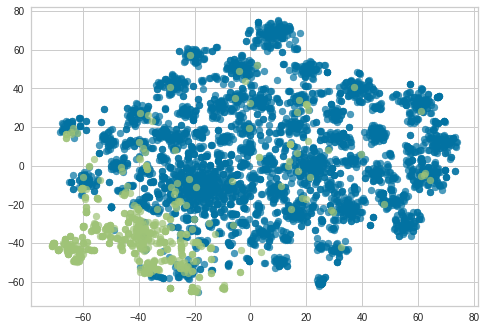

In [41]:
# t-sne on training data
from yellowbrick.text import TSNEVisualizer

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X_train_vec, y_train)

We can easily see the two classes. 

### 3.2 Complaints

In [42]:
# Import, clean, prepare
path = "https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week7/data/complaints_sample.csv"
df = pd.read_csv(path, index_col=0)

# Select columns of interest
data = df[["Product", "Consumer complaint narrative"]]
data.head()

# Drop NaN
print(data.isnull().sum())
data = data.dropna().reset_index(drop=True)
data.head()

# Clean
dic_replace = {'Credit reporting':'Credit reporting, credit repair services, or other personal consumer reports', 
               'Credit card':'Credit card or prepaid card', 
               'Payday loan':'Payday loan, title loan, or personal loan', 
               'Money transfers':'Money transfer, virtual currency, or money service',
               'Prepaid card':'Credit card or prepaid card',
               'Virtual currency':'Money transfer, virtual currency, or money service'}
data.replace(dic_replace, inplace=True)
data.Product.value_counts()

Product                            0
Consumer complaint narrative    5964
dtype: int64


Credit reporting, credit repair services, or other personal consumer reports    1290
Debt collection                                                                  640
Mortgage                                                                         378
Credit card or prepaid card                                                      291
Student loan                                                                     129
Checking or savings account                                                      119
Money transfer, virtual currency, or money service                                72
Bank account or service                                                           64
Vehicle loan or lease                                                             57
Payday loan, title loan, or personal loan                                         55
Consumer Loan                                                                     38
Other financial service                                          

In [43]:
# Define tokenizer function
def spacy_tokenizer(sentence):

    punctuations = string.punctuation
    stop_words = spacy.lang.en.stop_words.STOP_WORDS

    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Remove anonymous dates and people
    mytokens = [ word.replace('xx/', '').replace('xxxx/', '').replace('xx', '') for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in ["xxxx", "xx", ""] ]

    # Return preprocessed list of tokens
    return mytokens

# Select features
X = data['Consumer complaint narrative'] # the features we want to analyze
ylabels = data['Product'] # the labels, or answers, we want to test against

# Define vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), tokenizer=spacy_tokenizer)

# Vectorize
X_vec = tfidf.fit_transform(X)
X_vec = pd.DataFrame(X_vec.toarray())
X_vec

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8060,8061,8062,8063,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f754722ae48>,
               classes=None, colormap=None, colors=None, decompose=None,
               decompose_by=None, labels=None, random_state=None)

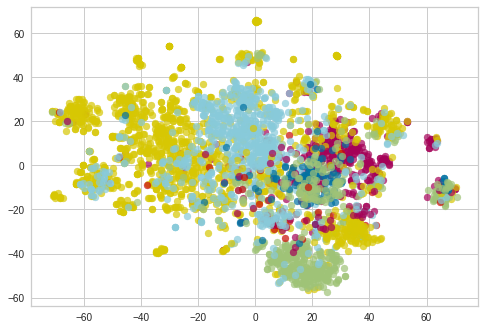

In [44]:
# t-sne
tsne = TSNEVisualizer()
tsne.fit(X_vec, ylabels)